
**1. Splitting Criterion for a Decision Tree in a classification problem**

The goal is to split the whole data set into subsets that are more pure than the parent by

1)Maximizing homogeneity within child nodes,

2)Minimizing impurity after splitting,

3)Creating child nodes where samples predominantly belong to one class.

In general, the splitting criterion aims to find features and thresholds that create the most homogeneous child nodes. Gini impurity is one of the most popular choices.


**Derivation of Gini Impurity**

$$\text{Gini} = \sum_{k=1}^{K} p_k \cdot (1 - p_k)$$

$$\text{Gini}= \sum_{k=1}^{K} p_k - \sum_{k=1}^{K} p_k^2$$
$$\text since \sum_{k=1}^{K} p_k = 1\:$$

$$\text{Gini} = 1 - \sum_{k=1}^{K} p_k^2$$ 

$p_k$: Proportion of class i into the group 
If all data belongs to one class, Gini = 0 
If data is mixed, Gini is higher.


**Step 1: Compute Gini before split**  
For a node $t$ with $N_t$ observations:

$$
\text{Gini}(t) = 1 - \sum_{i=1}^{k} \left(\frac{N_{i,t}}{N_t}\right)^2
$$

where $N_{i,t}$ is the number of observations of class $C_i$ in node $t$.

**Step 2: Compute Gini after split**  
Suppose a split divides the node into left ($t_L$) and right ($t_R$) child nodes.  
The weighted Gini after the split is:

$$\text{Gini}_{\text{split}}(t)= \frac{N_{L}}{N_t} \text{Gini}(t_L) + \frac{N_{R}}{N_t} \text{Gini}(t_R)
$$

**Step 3: Choose best split**  
The best split minimizes the weighted Gini:

$$\Delta \text{Gini} = \text{Gini}(t) - \text{Gini}_{\text{split}}(t)$$
By comparing the impurity before and after the split (the Gini Gain), the algorithm selects the feature and threshold that provide the greatest reduction in overall impurity, thus making the most informative decision boundary at that step.
$$
\text{Best Split} = \arg\min_{\text{all splits}} \text{Gini}_{\text{split}}
$$



**2.How Random Forest Improves Over a Single Decision Tree**

Problem with a Single Decision Tree

A single decision tree:

Is high-variance → small changes in data can produce a completely different tree

Overfits easily because it keeps splitting until nodes are pure

Captures noise in the training data and creates unstable predictions

Thus, although trees are easy to interpret, they perform poorly on unseen data.

$$\textbf{How Random Forest Fixes These Problems: through bootstrapping and feature bagging}$$
$$\textbf{A. Bootstrapping (Bagging)}$$

We create many training datasets by sampling with replacement from the original data

Each tree is trained on a different bootstrap sample

This means each tree sees slightly different data → trees become decorrelated

So,
Bootstrapping reduces variance, because averaging multiple uncorrelated models stabilizes the prediction.

$$\textbf{B. Feature Bagging (Random Subset of Features)}$$

When splitting a node:

A decision tree uses all features.

A Random Forest selects a random subset of features.

This prevents all trees from using the same dominant features.

In effect,

Reduces correlation between trees

Creates more diverse trees → better ensemble performance

Avoids overfitting to a single strong predictor

$$\textbf{C.Why Random Forest Performs Better}$$

$$\textbf{Lower Variance}$$

Averaging many decorrelated trees reduces variance

Even though each tree individually overfits, the ensemble smooths out noise.

$$\textbf{Less Overfitting}$$

A single tree overfits by memorizing the training data

Random Forest averages many overfitted trees → the noise cancels out

Therefore, it generalizes better to new data

More Robust and Stable

Not sensitive to outliers

Resistant to small changes in training data

Works well even when many features are irrelevant

$$\textbf{In summary,}$$
Random Forest improves over a single Decision Tree by using bootstrapping (different samples for each tree) and feature bagging (random subsets of features). This create many diverse, weakly correlated trees. When their predictions are averaged, variance is reduced, and overfitting decreases. As a result, Random Forests are more stable, robust, and have higher predictive accuracy than a single decision tree.

In [5]:
# Import libraries
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)

In [8]:
# from skrub import TableReport

# TableReport(df)

In [9]:
import numpy as np

df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(f"\nDataset Shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class names: {iris.target_names}")
print(f"\nClass distribution:")
print(df['species'].value_counts())

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nFeature statistics:")
print(df.describe())


Dataset Shape: (150, 4)
Number of samples: 150
Number of features: 4
Number of classes: 3
Class names: ['setosa' 'versicolor' 'virginica']

Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Feature statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000 

# 2. Apply Decision Tree, Random Forest, and SVM**

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix)
import warnings
warnings.filterwarnings('ignore')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=df["target"]
)

In [14]:
#Use cross-validation to tune the hyperparameters for each model (e.g., max depth for Decision Trees, number of trees , and kernel for SVM).

In [15]:
from sklearn.model_selection import StratifiedKFold

stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#DECISION TREE CLASSIFIER
dt_param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=stratified_cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)


dt_grid.fit(X_train, y_train)

print(f"\nBest parameters: {dt_grid.best_params_}")
print(f"Best cross-validation score: {dt_grid.best_score_:.4f}")

dt_best = dt_grid.best_estimator_

dt_cv_scores = cross_val_score(dt_best, X_train, y_train, cv=stratified_cv)
print(f"Cross-validation scores: {dt_cv_scores}")
print(f"Mean CV score: {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std()*2:.4f})")

dt_pred = dt_best.predict(X_test)

print("\nTuned Support Vector Machine (Grid Search) - Classification Report:\n", 
      classification_report(y_test, dt_pred))
print("\nTuned Support Vector Machine (Grid Search) - Confusion Matrix:\n", 
      confusion_matrix(y_test, dt_pred))


Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9553
Cross-validation scores: [1.         0.91666667 0.90909091 1.         1.         0.81818182
 1.         1.         1.         0.90909091]
Mean CV score: 0.9553 (+/- 0.1209)

Tuned Support Vector Machine (Grid Search) - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.92      0.86        13
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38


Tuned Support Vector Machine (Grid Search) - Confusion Matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]


In [16]:
#For Random Forests
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=stratified_cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

rf_grid.fit(X_train, y_train)

print(f"\nBest parameters: {rf_grid.best_params_}")
print(f"Best cross-validation score: {rf_grid.best_score_:.4f}")

rf_best = rf_grid.best_estimator_

rf_cv_scores = cross_val_score(rf_best, X_train, y_train, cv=stratified_cv)
print(f"Cross-validation scores: {rf_cv_scores}")
print(f"Mean CV score: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std()*2:.4f})")

print("\n--- Feature Importance ---")
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': rf_best.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance)

rf_pred = rf_best.predict(X_test)

print("\nTuned Support Vector Machine (Grid Search) - Classification Report:\n", 
      classification_report(y_test, rf_pred))
print("\nTuned Support Vector Machine (Grid Search) - Confusion Matrix:\n", 
      confusion_matrix(y_test, rf_pred))


Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.9644
Cross-validation scores: [1.         0.91666667 0.90909091 1.         1.         1.
 1.         0.90909091 1.         0.90909091]
Mean CV score: 0.9644 (+/- 0.0873)

--- Feature Importance ---
             feature  importance
2  petal length (cm)    0.445447
3   petal width (cm)    0.425137
0  sepal length (cm)    0.106125
1   sepal width (cm)    0.023290

Tuned Support Vector Machine (Grid Search) - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38


Tuned Support Vector Machine

In [17]:
#For kernel for SVM

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4]  
}

svm_grid = GridSearchCV(
    SVC(random_state=42),
    svm_param_grid,
    cv=stratified_cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

svm_grid.fit(X_train, y_train)

print(f"\nBest parameters: {svm_grid.best_params_}")
print(f"Best cross-validation score: {svm_grid.best_score_:.4f}")

svm_best = svm_grid.best_estimator_

svm_cv_scores = cross_val_score(svm_best, X_train, y_train, cv=stratified_cv)
print(f"Cross-validation scores: {svm_cv_scores}")
print(f"Mean CV score: {svm_cv_scores.mean():.4f} (+/- {svm_cv_scores.std()*2:.4f})")

svm_pred = svm_best.predict(X_test)

print("\nTuned Support Vector Machine (Grid Search) - Classification Report:\n", 
      classification_report(y_test, svm_pred))
print("\nTuned Support Vector Machine (Grid Search) - Confusion Matrix:\n", 
      confusion_matrix(y_test, svm_pred))


Best parameters: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.9826
Cross-validation scores: [1.         0.91666667 0.90909091 1.         1.         1.
 1.         1.         1.         1.        ]
Mean CV score: 0.9826 (+/- 0.0698)

Tuned Support Vector Machine (Grid Search) - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


Tuned Support Vector Machine (Grid Search) - Confusion Matrix:
 [[12  0  0]
 [ 0 13  0]
 [ 0  0 13]]


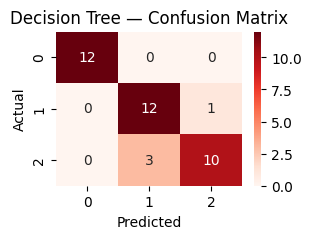

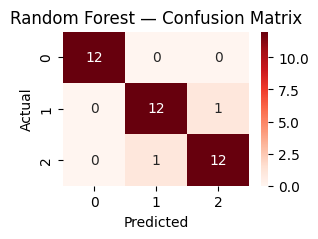

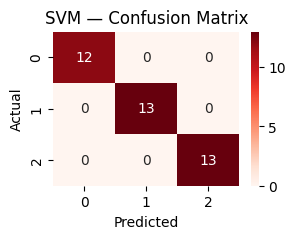

In [18]:
def plot_cm(model, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_cm(dt_best, "Decision Tree — Confusion Matrix")
plot_cm(rf_best, "Random Forest — Confusion Matrix")
plot_cm(svm_best, "SVM — Confusion Matrix")

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\n===== {model_name} Evaluation =====")

    print("\n--- Training Performance ---")
    print("Accuracy :", accuracy_score(y_train, y_train_pred))
    print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
    print("Recall   :", recall_score(y_train, y_train_pred, average='weighted'))
    print("F1-Score :", f1_score(y_train, y_train_pred, average='weighted'))

    print("\n--- Test Performance ---")
    print("Accuracy :", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
    print("Recall   :", recall_score(y_test, y_test_pred, average='weighted'))
    print("F1-Score :", f1_score(y_test, y_test_pred, average='weighted'))


In [20]:
#Evaluate all models

evaluate_model(dt_best, X_train, X_test, y_train, y_test, "Decision Tree")
evaluate_model(rf_best, X_train, X_test, y_train, y_test, "Random Forest")
evaluate_model(svm_best, X_train, X_test, y_train, y_test, "SVM")


===== Decision Tree Evaluation =====

--- Training Performance ---
Accuracy : 0.9642857142857143
Precision: 0.9677700348432056
Recall   : 0.9642857142857143
F1-Score : 0.9641810570381999

--- Test Performance ---
Accuracy : 0.8947368421052632
Precision: 0.9004784688995215
Recall   : 0.8947368421052632
F1-Score : 0.894110275689223

===== Random Forest Evaluation =====

--- Training Performance ---
Accuracy : 0.9821428571428571
Precision: 0.983058608058608
Recall   : 0.9821428571428571
F1-Score : 0.9821298036758563

--- Test Performance ---
Accuracy : 0.9473684210526315
Precision: 0.9473684210526315
Recall   : 0.9473684210526315
F1-Score : 0.9473684210526315

===== SVM Evaluation =====

--- Training Performance ---
Accuracy : 0.9821428571428571
Precision: 0.983058608058608
Recall   : 0.9821428571428571
F1-Score : 0.9821298036758563

--- Test Performance ---
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-Score : 1.0


In [21]:
models = [dt_best, rf_best, svm_best]
names = ['Decision Tree', 'Random Forest', 'SVM']

def get_metrics(model, X, y):
    y_pred = model.predict(X)
    return {
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred, average='weighted'),
        'Recall': recall_score(y, y_pred, average='weighted'),
        'F1-Score': f1_score(y, y_pred, average='weighted')
    }

rows = []
for name, model in zip(names, models):
    train_metrics = get_metrics(model, X_train, y_train)
    test_metrics  = get_metrics(model, X_test, y_test)
    rows.append([name, 'Train'] + list(train_metrics.values()))
    rows.append([name, 'Test'] + list(test_metrics.values()))

df_metrics = pd.DataFrame(rows, columns=['Model', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_metrics

,Model,Dataset,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,Train,0.964286,0.967770,0.964286,0.964181
1,Decision Tree,Test,0.894737,0.900478,0.894737,0.894110
2,Random Forest,Train,0.982143,0.983059,0.982143,0.982130
3,Random Forest,Test,0.947368,0.947368,0.947368,0.947368
4,SVM,Train,0.982143,0.983059,0.982143,0.982130
5,SVM,Test,1.000000,1.000000,1.000000,1.000000


**Comparison**

**Decision Tree**

Performs well on training data but test performance drops to 0.895 accuracy, indicating some overfitting.

**Random Forest**

Higher training accuracy (0.982) and better test performance (0.947) than a single tree.

Ensemble effect: averaging multiple trees reduces variance and improves generalization.

**SVM**

Excellent training (0.982) and perfect test performance (1.0).

Efficiently separates classes and handles the balanced dataset well.

**In summary**

I used stratified splitting to ensure that class proportions are preserved.

Decision Tree is simpler but prone to overfitting.

Random Forest stabilizes predictions and generalizes better than a single tree.

SVM shows the best generalization on this dataset, achieving perfect test metrics.